In [6]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix,accuracy_score,f1_score,roc_curve
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.layers import Activation, Dense, Dropout, Embedding, LSTM
import re
from IPython.display import display
import os
import string
import time
import random
import matplotlib.pyplot as plt
random.seed(10)

In [108]:
# Import Data
games_folder_path = "C:/Users/Craig/Documents/Thesis/Thomas_Gallagher_Thesis/Data/AFL_Stats_sorted/Year/Games/"
games_2012 = pd.read_csv(games_folder_path + '2012.csv', index_col=False, parse_dates=['date'])
all_games = pd.read_csv(games_folder_path + 'games_sorted.csv', index_col=False, parse_dates=['date'])

In [109]:
# One Hot Encoding Teams
encoding = LabelEncoder()
encoding.fit(all_games["homeTeam"].values)

def OHE_Teams(games):
    home_teams = encoding.transform(games["homeTeam"].values)
    away_teams = encoding.transform(games["awayTeam"].values)

    all_teams = np.vstack([home_teams, away_teams]).T
 
    oneHot = OneHotEncoder()
    X_teams = oneHot.fit_transform(all_teams).todense()
    X_teams = pd.DataFrame(X_teams)
    games = pd.concat([games, pd.DataFrame(X_teams)],axis=1)
    return games

games_2012 = OHE_Teams(games_2012)
# games_2013 = OHE_Teams(games_2013)
# games_2014 = OHE_Teams(games_2014)
# games_2015 = OHE_Teams(games_2015)
# games_2016 = OHE_Teams(games_2016)
# games_2017 = OHE_Teams(games_2017)
# games_2018 = OHE_Teams(games_2018)
# games_2019 = OHE_Teams(games_2019)
# games_2020 = OHE_Teams(games_2020)
# games_2021 = OHE_Teams(games_2021)

In [110]:
# One Hot Encoding Venues
encoding = LabelEncoder()
encoding.fit(all_games["venue"].values)
all_venues = all_games["venue"].values

all_venues = all_venues.reshape(-1,1)

def OHE_Venues(games):
    venues = games['venue'].values
    # all_venues = all_venues.reshape(-1,1)
    
    venues = venues.reshape(-1,1)

    oneHot = OneHotEncoder()

    oneHot.fit(all_venues)
    X_venues = oneHot.transform(venues).toarray()
    X_venues = pd.DataFrame(X_venues, columns=oneHot.categories_[0])
    games = pd.concat([games, X_venues], axis=1)
    return games

games_2012 = OHE_Venues(games_2012)
# games_2013 = OHE_Venues(games_2013)
# games_2014 = OHE_Venues(games_2014)
# games_2015 = OHE_Venues(games_2015)
# games_2016 = OHE_Venues(games_2016)
# games_2017 = OHE_Venues(games_2017)
# games_2018 = OHE_Venues(games_2018)
# games_2019 = OHE_Venues(games_2019)
# games_2020 = OHE_Venues(games_2020)
# games_2021 = OHE_Venues(games_2021)

In [111]:
y_true_2012 = games_2012['homeWin']
# games_2012['value'] = games_2012['homeWin']
drop_values = ['gameId', 'venue', 'homeWin', 'homeTeam', 'awayTeam', 'year','date','startTime', 'attendance', 'homeTeamScore', 'awayTeamScore', 'round']
games_2012 = games_2012.drop(drop_values,axis=1)
games_2012.columns = games_2012.columns.astype(str) 

In [112]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
games_2012 = scaler.fit_transform(games_2012)

In [167]:
x_train_2012 = games_2012[:171]
y_train_2012 = y_true_2012[:171]
x_valid_2012 = games_2012[171:]
y_valid_2012 = y_true_2012[171:]

In [160]:

x_train_2012 = pd.DataFrame(x_train_2012)
x_train_2012['value'] = y_train_2012
x_valid_2012 = pd.DataFrame(x_valid_2012)
x_valid_2012['value'] = y_valid_2012


# for v in range (len(y_train_2012)):
#     if str(y_train_2012[v]) == '2':
#         y_train_2012[v] = True
#     else:
#         y_train_2012[v] = False

# for v in range (len(y_valid_2012)):
#     v += 171
#     print (y_valid_2012)
#     if str(y_valid_2012[v]) == '2':
#         y_valid_2012[v] = True
#     else:
#         y_valid_2012[v] = False


In [169]:
e = Embedding(50, 2, input_length= 78)

In [181]:
model = Sequential()
model.add(e)
model.add(LSTM( 128 , dropout = 0.25, recurrent_dropout = 0.25))
model.add(Dense(1, activation = 'tanh' ))
model.build()
model.summary()
model.compile( optimizer = "adam" , loss = 'categorical_crossentropy' , metrics = ['accuracy'] )
early_stopper = EarlyStopping( monitor = 'val_accuracy' , min_delta = 0.0005, patience = 3 )
reduce_lr = ReduceLROnPlateau( monitor = 'val_loss' , patience = 2 , cooldown = 0)
callbacks = [ reduce_lr , early_stopper]
train_history = model.fit( x_train_2012 , y_train_2012 , epochs = 10, validation_split = 0.1 , verbose = 1 , callbacks = callbacks)
# train_history = model.fit( x_train_2012 , y_train_2012 , epochs = 10, validation_split = 0.1 , verbose = 1 )
score = model.evaluate( x_valid_2012 , y_valid_2012 )
print( "Accuracy: {:0.4}".format( score[1] ))
print( "Loss:", score[0] )


Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_31 (Embedding)    (None, 78, 2)             100       
                                                                 
 lstm_101 (LSTM)             (None, 128)               67072     
                                                                 
 dense_97 (Dense)            (None, 1)                 129       
                                                                 
Total params: 67,301
Trainable params: 67,301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
5/5 [==============================] - 5s 246ms/step - loss: 1.2934e-07 - accuracy: 0.4575 - val_loss: 1.5895e-07 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 2/10
5/5 [==============================] - 1s 122ms/step - loss: 1.2934e-07 - accuracy: 0.4575 - val_loss: 1.5895e-07 - val_accuracy: 0.3333 - lr

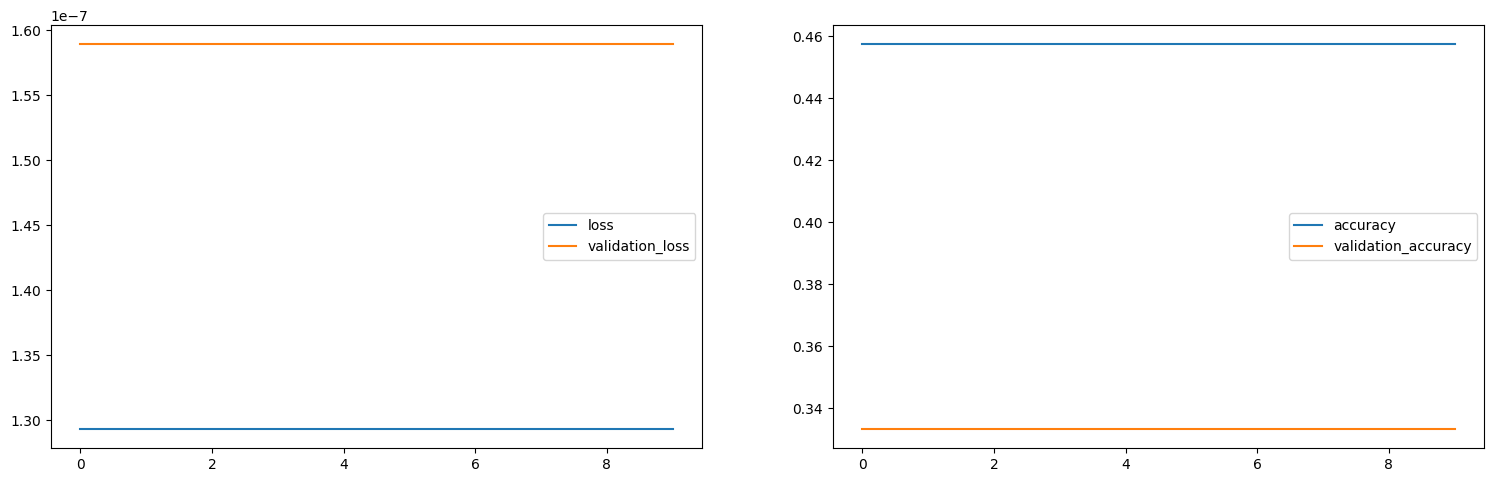

In [83]:
loss = train_history.history['loss']
validation_loss = train_history.history['val_loss']
accuracy = train_history.history['accuracy']
val_accuracy = train_history.history['val_accuracy']
fig = plt.gcf()
fig.set_size_inches(18.5, 5.5)
plt.subplot(1,2,1)
plt.plot(loss)
plt.plot(validation_loss)
plt.legend(['loss', 'validation_loss'])
plt.subplot(1,2,2)
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.legend(['accuracy', 'validation_accuracy'])
plt.show()

In [84]:
from tensorflow import keras
# from tensorflow.keras import layers

layers = keras.layers
def get_lstm_model(featureSize):
	# input for variable-length sequences of integers
	inputs = keras.Input(shape=(None,), dtype="int32")
	# embed the tokens in a 128-dimensional vector with masking
	# applied and apply dropout
	x = layers.Embedding(featureSize, 128, mask_zero=True)(inputs)
	x = layers.Dropout(0.2)(x)
	# add 3 LSTMs
	x = layers.LSTM(64, return_sequences=True)(x)
	x = layers.LSTM(64, return_sequences=True)(x)
	x = layers.LSTM(64)(x)
	# add a classifier head
	x = layers.Dense(units=64, activation="relu")(x)
	x = layers.Dense(units=32, activation="relu")(x)
	x = layers.Dropout(0.2)(x)
	outputs = layers.Dense(1, activation="sigmoid")(x)
	
	# build the LSTM model
	model = keras.Model(inputs, outputs, name="LSTM")
	
	# return the LSTM model
	return model

In [163]:
# get the LSTM model and compile it
print("[INFO] building the LSTM model...")
modelLSTM = get_lstm_model(featureSize=55)
modelLSTM.compile(metrics=["accuracy"],
	optimizer=keras.optimizers.Adam(learning_rate=0.001),
	loss=keras.losses.CategoricalCrossentropy(from_logits=False),
)
# train the LSTM model
print("[INFO] training the LSTM model...")
historyLSTM = modelLSTM.fit(x_train_2012['value'] , epochs=5,
	validation_data=x_valid_2012['value'] , 
)

[INFO] building the LSTM model...
[INFO] training the LSTM model...


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [184]:
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def create_larger():
 # create model
 model = Sequential()
 model.add(Dense(60, input_shape=(78,), activation='relu'))
 model.add(Dense(30, activation='relu'))
 model.add(Dense(1, activation='sigmoid'))
 # Compile model
 model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_larger, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, x_train_2012, y_train_2012, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Larger: 64.93% (12.25%)
